# Author: Miguel Angel Rizzo
# Overview
- Built a predictive model using data from 400+ used cars and their vehicle caracteristics. The goal was predicting a car's fuel economy given it's weight.
- Used pre-processing techniques on the data to resolve inconsistencies such as missing data and removing outiliers
- Compared a simple linear model with a curve fitting model and interpreted results

In [3]:
"""
Created on Mon Mar 22 15:41:50 2021

@author: Rizzo, M.
"""
##### Importing Libraries #####
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandasql import sqldf
import warnings
warnings.filterwarnings("ignore")
pysqldf = lambda q: sqldf(q, globals())
print('Libraries Imported Successfully')

Libraries Imported Successfully


## Data Preprocessing
Before starting to make any predictions, it is important that the sample data is adequate for model training, data preprocessing refers to the addition, deletion or transformations of the sample data to improve the prediction accuracy.

In [4]:
#Read the dataset
df = pd.read_csv('C:/Users/Estudio/MPG/auto-mpg.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406 entries, 0 to 405
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     406 non-null    int64  
 2   displacement  406 non-null    float64
 3   horsepower    400 non-null    float64
 4   weight        406 non-null    int64  
 5   acceleration  406 non-null    float64
 6   year          406 non-null    int64  
 7   origin        406 non-null    int64  
 8   carname       406 non-null    object 
dtypes: float64(4), int64(4), object(1)
memory usage: 28.7+ KB


As we can see below there are multiple values that are missing on the Mpg and Horsepower Columns, we will try to solve this problem later on. 

In [5]:
#Pre-processing Data
# Querying Unique values
for n in df:
    a=df[n].unique()
    print (n)
    print (sorted(a))

mpg
[9.0, 10.0, 14.0, 14.5, 15.0, 15.5, 16.0, 16.2, 16.5, 16.9, 17.0, 17.5, 17.6, 17.7, 18.0, nan, 11.0, 12.0, 13.0, 18.1, 18.2, 18.5, 18.6, 19.0, 19.1, 19.2, 19.4, 19.8, 19.9, 20.0, 20.2, 20.3, 20.5, 20.6, 20.8, 21.0, 21.1, 21.5, 21.6, 22.0, 22.3, 22.4, 22.5, 23.0, 23.2, 23.5, 23.6, 23.7, 23.8, 23.9, 24.0, 24.2, 24.3, 24.5, 25.0, 25.1, 25.4, 25.5, 25.8, 26.0, 26.4, 26.5, 26.6, 26.8, 27.0, 27.2, 27.4, 27.5, 27.9, 28.0, 28.1, 28.4, 28.8, 29.0, 29.5, 29.8, 29.9, 30.0, 30.5, 30.7, 30.9, 31.0, 31.3, 31.5, 31.6, 31.8, 31.9, 32.0, 32.1, 32.2, 32.3, 32.4, 32.7, 32.8, 32.9, 33.0, 33.5, 33.7, 33.8, 34.0, 34.1, 34.2, 34.3, 34.4, 34.5, 34.7, 35.0, 35.1, 35.7, 36.0, 36.1, 36.4, 37.0, 37.2, 37.3, 37.7, 38.0, 38.1, 39.0, 39.1, 39.4, 40.8, 40.9, 41.5, 43.1, 43.4, 44.0, 44.3, 44.6, 46.6]
cylinders
[3, 4, 5, 6, 8, 16]
displacement
[68.0, 70.0, 71.0, 72.0, 76.0, 78.0, 79.0, 80.0, 81.0, 83.0, 85.0, 86.0, 88.0, 89.0, 90.0, 91.0, 96.0, 97.0, 97.5, 98.0, 100.0, 101.0, 104.0, 105.0, 107.0, 108.0, 110.0, 111.

In [1]:
#missing values
print('missing values:','\n',df.isna().sum(),'\n')

NameError: name 'df' is not defined

### Identifying outliers
Outliers are generally defined as samples that are exceptionally far from
the mainstream of the data. Under certain assumptions, there are formal statistical definitions of an outlier. With small sample sizes like in this case, apparent outliers might affect the variability and central tendency of the data. Therefore it is important to spot them and assure they are properly dealt with. An useful technique that helps identify outliers is the boxplot. However, it should be complemented with our intuition and knowledge of the subject matter.

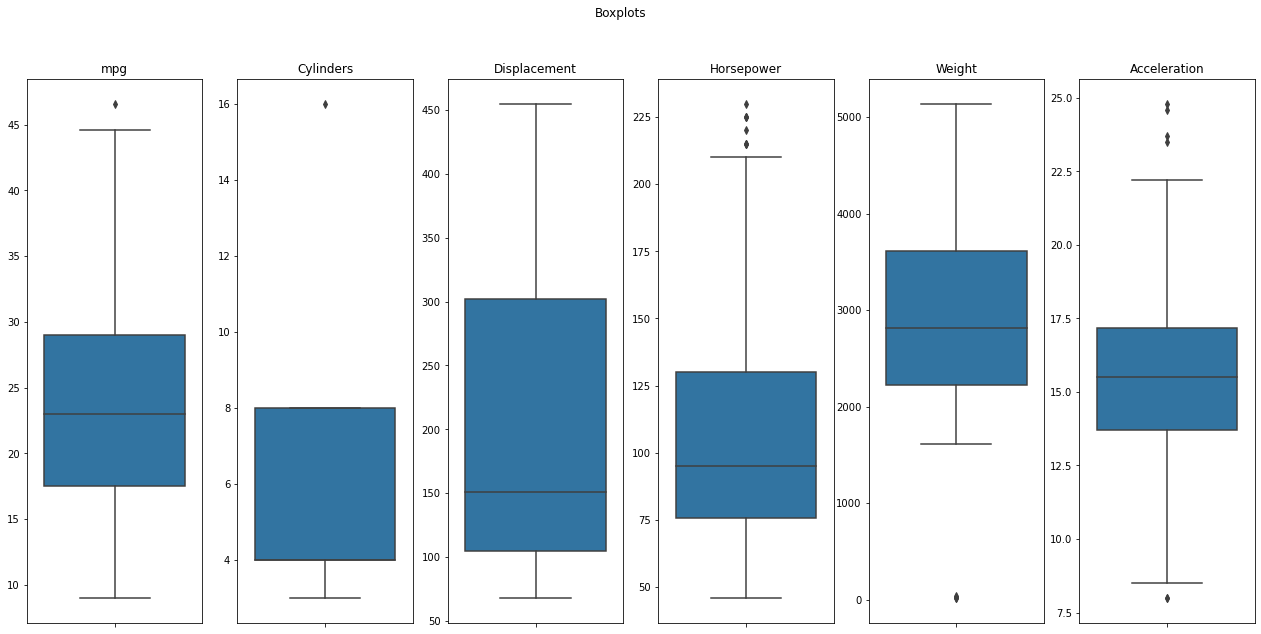

In [7]:
# Identyfying outliers
#Boxplots
plt.figure(figsize=(22, 10))
plt.suptitle('Boxplots')
plt.subplot(161)
sns.boxplot(y=df.mpg)
plt.ylabel('')
plt.title('mpg')
plt.subplot(162)
sns.boxplot(y=df.cylinders)
plt.ylabel('')
plt.title('Cylinders')
plt.subplot(163)
sns.boxplot(y=df.displacement)
plt.ylabel('')
plt.title('Displacement')
plt.subplot(164)
sns.boxplot(y=df.horsepower)
plt.ylabel('')
plt.title('Horsepower')
plt.subplot(165)
sns.boxplot(y=df.weight)
plt.ylabel('')
plt.title('Weight')
plt.subplot(166)
sns.boxplot(y=df.acceleration)
plt.ylabel('')
plt.title('Acceleration')
plt.show()

The points on the graphs suggest that there are outliers in the data, before removing or changing the values, it is important to check whether the values are scientifically valid. As the sample is composed of cars, all values seem possible apart from the low values from the weight boxplot. The latter values seem to be on a different scale from the rest of the data so let's investigate to find out. 

In [8]:
#Weight Outliers
print(sorted(df.weight))

[19, 22, 26, 42, 1613, 1649, 1755, 1760, 1773, 1795, 1795, 1800, 1800, 1825, 1825, 1834, 1835, 1835, 1836, 1845, 1850, 1867, 1875, 1915, 1925, 1937, 1937, 1940, 1950, 1950, 1955, 1963, 1965, 1965, 1968, 1970, 1975, 1975, 1978, 1980, 1985, 1985, 1985, 1985, 1990, 1990, 1995, 2000, 2003, 2019, 2020, 2025, 2035, 2045, 2045, 2046, 2050, 2051, 2065, 2065, 2070, 2074, 2075, 2085, 2100, 2108, 2110, 2110, 2120, 2123, 2124, 2125, 2125, 2125, 2126, 2130, 2130, 2130, 2130, 2135, 2144, 2145, 2150, 2155, 2155, 2155, 2158, 2160, 2164, 2164, 2171, 2188, 2189, 2190, 2190, 2200, 2202, 2205, 2210, 2215, 2219, 2220, 2220, 2223, 2226, 2228, 2230, 2234, 2245, 2246, 2254, 2255, 2264, 2265, 2265, 2265, 2278, 2279, 2288, 2295, 2300, 2300, 2300, 2310, 2320, 2330, 2335, 2350, 2370, 2372, 2375, 2379, 2380, 2385, 2391, 2395, 2395, 2401, 2405, 2408, 2408, 2420, 2430, 2434, 2451, 2464, 2472, 2489, 2490, 2500, 2506, 2511, 2515, 2525, 2542, 2542, 2545, 2556, 2560, 2565, 2572, 2575, 2582, 2585, 2587, 2592, 2595, 2600,

In [9]:
# Writing a SQL query to select the rows where the cars' weight is less than 1000
pysqldf(""" SELECT * FROM df WHERE weight<1000 """)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,carname
0,17.5,8,305.0,140.0,42,13.0,76,1,chevrolet chevelle malibu classic
1,33.5,4,85.0,70.0,19,16.8,77,3,datsun f-10 hatchback
2,32.4,4,107.0,72.0,22,17.0,80,3,honda accord
3,32.0,4,144.0,96.0,26,13.9,82,3,toyota celica gt


It seems that some of the weight values are on a different scale.
Those values probably aren't outliers and the data was likely inputed on a different measure,
for now it seems reasonable to multiply them by 100 in order to fit them to the actual distribution of the data.

In [10]:
for n in df.index:
    if df.weight[n]<1000:
       df.weight[n]=df.weight[n]*100 

pysqldf(""" SELECT * FROM df WHERE weight<1000 """) 

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,carname


### Dealing with missing Values
In order to deal with missing values we will use imputation.
we can use information in the predictors to, in essence, estimate the values of other predictors.
One popular technique for imputation is a K-nearest neighbor model.
A new sample is imputed by finding the samples in the training set “closest”
to it and averages these nearby points to fill in the value. Troyanskaya et al.
(2001)

In [11]:
# Dealing with missing values
## Using KNN Imputer
from sklearn.impute import KNNImputer
df.cylinders.describe()
knn_imputer = KNNImputer(n_neighbors=3)
impute_copy = df[['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration','origin']].copy()
x=impute_copy.loc[:,['mpg','horsepower']].values
y=impute_copy.loc[:,['cylinders', 'displacement', 'weight','origin','acceleration']].values
z=knn_imputer.fit_transform(x)
df.mpg=z[:,0]
df.horsepower=z[:,1]

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406 entries, 0 to 405
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           406 non-null    float64
 1   cylinders     406 non-null    int64  
 2   displacement  406 non-null    float64
 3   horsepower    406 non-null    float64
 4   weight        406 non-null    int64  
 5   acceleration  406 non-null    float64
 6   year          406 non-null    int64  
 7   origin        406 non-null    int64  
 8   carname       406 non-null    object 
dtypes: float64(4), int64(4), object(1)
memory usage: 28.7+ KB


Perfect! Now the data is clean and we can start to investigate the relationship between the predictor and response variables

### Correlation of predictor and response variables


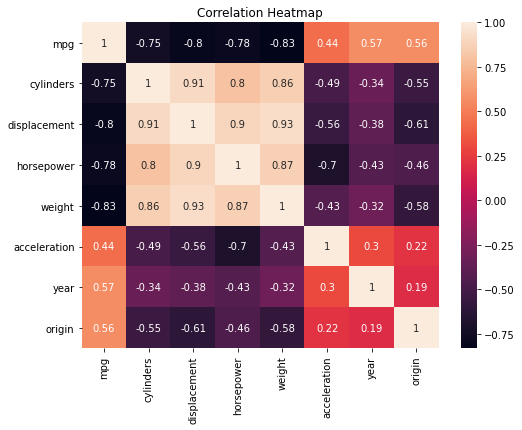

In [12]:
# Correlation Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(),annot=True)
plt.title('Correlation Heatmap')
plt.show()

The above figure shows a correlation matrix of the dataset. Each pairwise
correlation is computed from the data and colored according to its
magnitude. This visualization is symmetric: the top and bottom diagonals
show identical information. These values range from -1 to 1 and represent the direction aswell as the strength of the relationship between characteristics.

### Checking for multicollinearity
Collinearity refers to a strong correlation between predictor variables (or independent variables), such that they express a linear relationship in a regression model. When predictor variables in the same regression model are correlated, they explain some of the same variance in the dependent variable, which in turn reduces their statistical significance.

Classical regression analysis has several tools to diagnose multicollinearity
for linear regression. Since collinear predictors can impact the variance of
parameter estimates in this model, a statistic called the variance inflation
factor (VIF) can be used to identify predictors that are impacted (Myers
1994)

In [13]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
df=df.iloc[:,:-1]
pd.Series([variance_inflation_factor(df.values,i) for i in range(df.shape[1])],index=df.columns) 

mpg              51.470244
cylinders        62.250143
displacement     78.801467
horsepower       68.174691
weight          171.912320
acceleration     68.051839
year            267.009699
origin            8.851372
dtype: float64

For this model it is advisable to use a single predictor variable to avoid collinearity , given that the VIF values for the predictors variables are large.
The selected predictor is weight as it hold the strongest relationship with a car's fuel economy.

In [14]:
# Importing Machine Learning Libraries
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math
import statsmodels.api as sm
import scipy.stats as stats
# Selecting predictor Variable
x=df[['weight']]
# y-intercept
x['c']=1
#Response Variable
y=df['mpg']

### Ordinary Least Squares regression
The OLS regression model is one of the most commonly used predictive models, it basically finds the best fit line by minimizing the squared residuals between the predicted and observed values.

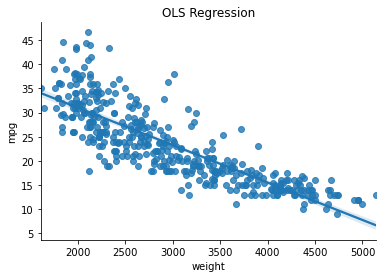

In [15]:
#Baseline Model
#Ordinary Least Squares Regression
model=sm.OLS(y,x).fit()
y_pred = model.predict(x)
#regression plot
sns.regplot(df.weight,df.mpg)
sns.despine()
plt.title('OLS Regression')
plt.show()

In [16]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.694
Model:                            OLS   Adj. R-squared:                  0.693
Method:                 Least Squares   F-statistic:                     915.9
Date:                Wed, 28 Apr 2021   Prob (F-statistic):          6.53e-106
Time:                        12:18:25   Log-Likelihood:                -1173.1
No. Observations:                 406   AIC:                             2350.
Df Residuals:                     404   BIC:                             2358.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
weight        -0.0077      0.000    -30.264      0.000      -0.008      -0.007
c             46.4960      0.792     58.701      0.000      44.939      48.053
==============================================================================
Omnibus:                       42.291   Durbin-Watson:                   0.913
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               59.544
Skew:                           0.728   Prob(JB):                     1.18e-13
Kurtosis:                       4.182   Cond. No.                     1.13e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.13e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### What does this mean?
As a result of applying OLS to the dataset we get an mathematical equation that attempts to model the relationship between the predictor variable (weight) and the response variable (fuel economy).
The resulting equation is the following:
#### Miles per Gallon(MPG)= -0.008* Weight + 46.496
This can be interpreted that for every unit increase of weight, the MPG value reduces by 0.008

### Ok, now we got an equation, but how do we know how accurate it is?
There are many indicators that attempt to ilustrate the accuracy of any given model, one way is using the Mean Absolute Error (MAE). It’s the average over the test sample of the absolute differences between prediction and actual observation where all individual differences have equal weight. The MAE express average model prediction error in units of the variable of interest. This metric can range from 0 to ∞ and are indifferent to the direction of errors. It is a negatively-oriented score, which means lower values are better.


In [17]:
#RSME & MAE (Model Accuracy)
mae = mean_absolute_error(y,y_pred)
print('Mean Absolute Error = ',mae)

Mean Absolute Error =  3.2986943738217516


We can interpret the result above as: Our model predicts the fuel economy of a car given it's weight with an average prediction error of 3.3 miles per gallon.

### Model Validation
Residual plots display the residual values on the y-axis and fitted values, or another variable, on the x-axis. After you fitting a regression model, it is crucial to check the residual plots. If the plots display unwanted patterns, you can’t trust the regression coefficients and other numeric results.


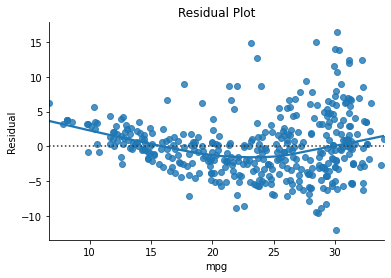

In [18]:
#Residual plots
sns.residplot(y_pred,y,lowess=True)
plt.title('Residual Plot')
plt.ylabel('Residual')
plt.xlabel('mpg')
sns.despine()
plt.show()

When looking at residual plots, you simply want to determine whether the residuals are consistent with random error.
How do you determine whether the residuals are random in regression analysis? It’s pretty simple, just check that they are randomly scattered around zero for the entire range of fitted values. When the residuals center on zero, they indicate that the model’s predictions are correct on average rather than systematically too high or low.

Our residual plot below clearly has a pattern!

By the above results we can conclude that the simple linear model is not a perfect fit for our dataset, so let's use a model that attempts fits a curve to the data, in an attempt to produce better results.

### Using a Local regression to fit a curve to data

In [19]:
#Curve Fitting
lowess = sm.nonparametric.lowess
fittedcurve=lowess(y, df.weight, frac=0.6666666666666666, 
      it=3, delta=0.0,is_sorted=False,
      missing='drop', return_sorted=False)

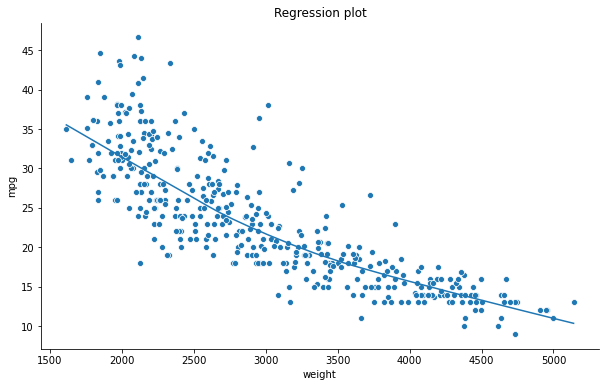

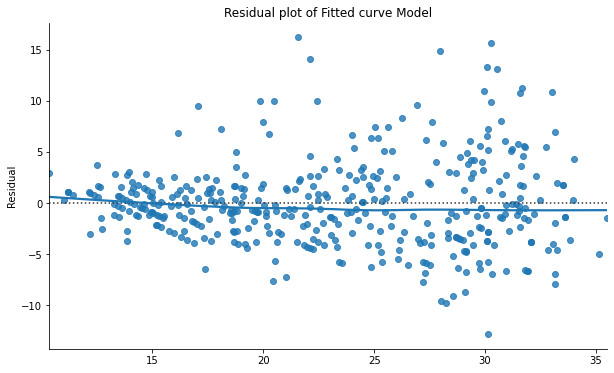

In [20]:
#Regressionplot
plt.figure(figsize=(10,6))
sns.scatterplot(df.weight,df.mpg)
sns.lineplot(df.weight,fittedcurve)
plt.title('Regression plot')
sns.despine()
plt.show()
plt.figure(figsize=(10,6))
sns.residplot(fittedcurve,y,lowess=True)
plt.title('Residual plot of Fitted curve Model')
plt.ylabel('Residual')
sns.despine()
plt.show()

In [21]:
mae2 = mean_absolute_error(y,fittedcurve)
rmse2 = math.sqrt(mean_squared_error(y,fittedcurve))
print('Root Mean Squared Error = ',rmse2)
print('Mean Absolute Error = ',mae2)

Root Mean Squared Error =  4.2020326238814825
Mean Absolute Error =  3.0570433201643827


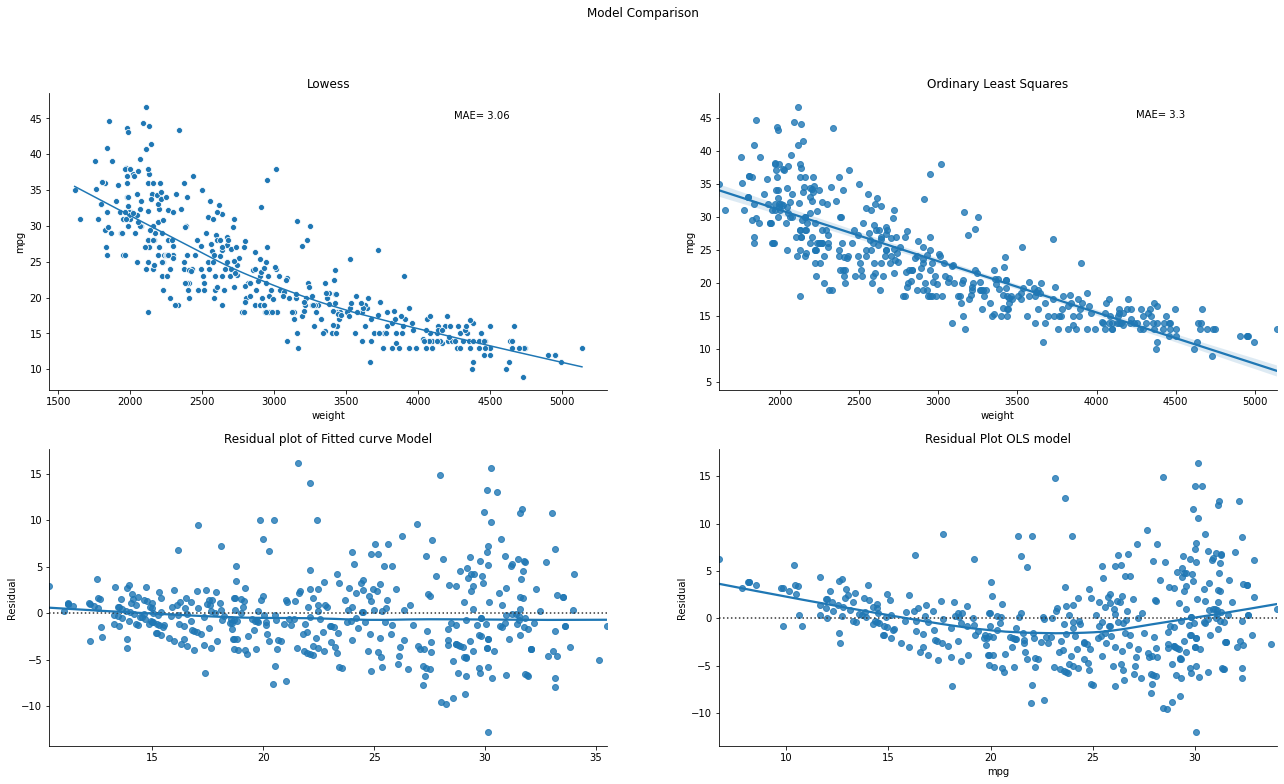

In [22]:

#Comparing models
plt.figure(figsize=(22, 12))
plt.suptitle('Model Comparison')
plt.subplot(221)
sns.scatterplot(df.weight,df.mpg)
plt.text(4250, 45, r'MAE= ' + str(round(mae2,2)))
sns.lineplot(df.weight,fittedcurve)
plt.title('Lowess')
sns.despine()
plt.subplot(222)
sns.regplot(df.weight,df.mpg)
plt.title('Ordinary Least Squares')
plt.text(4250, 45, r'MAE= ' + str(round(mae,2)))
sns.despine()
plt.subplot(223)
sns.residplot(fittedcurve,y,lowess=True)
plt.title('Residual plot of Fitted curve Model')
plt.ylabel('Residual')
sns.despine()
plt.subplot(224)
sns.residplot(y_pred,y,lowess=True)
plt.title('Residual Plot OLS model')
plt.ylabel('Residual')
plt.xlabel('mpg')
sns.despine()
plt.show()


### Conclusion : The tradeoff between accuracy and interpretability

While the primary interest of predictive modeling is to generate accurate
predictions, a secondary interest may be to interpret the model and understand
why it works. The unfortunate reality is that as we push towards higher
accuracy, models become more complex and their interpretability becomes
more difficult. This is almost always the trade-off we make when prediction
accuracy is the primary goal.

While the simple linear regression model is easy to interpret and explain, it does not perform particulary well in this dataset.

The disadvantage of the curve fitting model is the fact that it does not produce a regression function that is easily represented by a mathematical formula. This can make it difficult to transfer the results of an analysis to other people. In order to transfer the regression function to another person, they would need the data set and software for LOESS calculations.

